In [25]:
!pip install geopandas

In [26]:
# import necessary packages
import os
import geopandas as gpd
from geopandas import GeoSeries
import shapely
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, box
from matplotlib import pyplot as plt
import fiona

In [27]:
!wget https://www.gis.lcc.mn.gov/redist2020/Congressional/C2102_0/geography/c2102_0-shp.zip -O Torkelson.zip
!unzip -o Torkelson.zip

--2022-04-01 20:48:02--  https://www.gis.lcc.mn.gov/redist2020/Congressional/C2102_0/geography/c2102_0-shp.zip
Resolving www.gis.lcc.mn.gov (www.gis.lcc.mn.gov)... 156.98.79.215
Connecting to www.gis.lcc.mn.gov (www.gis.lcc.mn.gov)|156.98.79.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1081186 (1.0M) [application/zip]
Saving to: ‘Torkelson.zip’

Torkelson.zip       100%[===================>]   1.03M  2.96MB/s    in 0.3s    

2022-04-01 20:48:02 (2.96 MB/s) - ‘Torkelson.zip’ saved [1081186/1081186]

Archive:  Torkelson.zip
  inflating: c2102_0.dbf             
  inflating: c2102_0.prj             
  inflating: c2102_0.shp             
  inflating: c2102_0.shx             


In [28]:
# path to shapefile
filepath = "./c2102_0.shp"

# read file using gpd.read_file()
data = gpd.read_file(filepath)

In [29]:
data.head() #look at top entries - looks like a pandas dataframe

,ID,AREA,DISTRICT,MEMBERS,LOCKED,NAME,POPULATION,NH_WHT,HISPANIC_O,NH_DOJ_BLK,...,F_NH18_DO3,F_NH18_DO4,F_NH18_DO5,F_NH18_WHT,F_18_POP,F_DEM_INDE,F_REP_INDE,F_THIRD_IN,DISTRICT_L,geometry
0,1,16290.130800,1,1.0,None,None,713312,588790,51509,24337,...,0.000686,0.002196,0.021919,0.857103,0.768008,0.472704,0.479577,0.047719,1|0%,"POLYGON ((426048.149 4923021.478, 426060.799 4..."
1,2,3877.858880,2,1.0,None,None,713312,583835,39342,25954,...,0.000319,0.003631,0.026501,0.848049,0.741719,0.443753,0.513316,0.042931,2|0%,"POLYGON ((521223.785 4951253.465, 521495.479 4..."
2,3,322.849792,3,1.0,None,None,713311,505701,57233,58691,...,0.000392,0.004248,0.031409,0.753804,0.780561,0.558327,0.403158,0.038515,3|-0%,"POLYGON ((474801.462 4951622.236, 474786.888 4..."
3,4,270.618195,4,1.0,None,None,713312,435643,54955,84397,...,0.000336,0.003865,0.033820,0.669653,0.772303,0.643897,0.303579,0.052524,4|0%,"POLYGON ((501218.244 4993687.753, 501222.650 4..."
4,5,134.650406,5,1.0,None,None,713311,405615,68259,137608,...,0.000368,0.004694,0.040017,0.626569,0.795635,0.749810,0.200285,0.049905,5|-0%,"POLYGON ((468430.733 4999918.231, 468433.720 4..."


In [30]:
data.columns

Index(['ID', 'AREA', 'DISTRICT', 'MEMBERS', 'LOCKED', 'NAME', 'POPULATION',
       'NH_WHT', 'HISPANIC_O', 'NH_DOJ_BLK', 'NH_DOJ_IND', 'NH_DOJ_ASN',
       'NH_DOJ_HWN', 'NH_DOJ_OTH', 'NH_DOJ_OT1', 'H18_POP', 'NH18_DOJ_B',
       'NH18_DOJ_I', 'NH18_DOJ_A', 'NH18_DOJ_H', 'NH18_DOJ_O', 'NH18_DOJ_1',
       'NH18_WHT', 'F18_POP', 'DEM_INDEX', 'REP_INDEX', 'THIRD_INDE',
       'INDEX_VOTE', 'IDEAL_VALU', 'DEVIATION', 'F_DEVIATIO', 'F_NH_WHT',
       'F_HISPANIC', 'F_NH_DOJ_B', 'F_NH_DOJ_I', 'F_NH_DOJ_A', 'F_NH_DOJ_H',
       'F_NH_DOJ_O', 'F_NH_DOJ_1', 'F_NH18_DOJ', 'F_NH18_DO1', 'F_NH18_DO2',
       'F_NH18_DO3', 'F_NH18_DO4', 'F_NH18_DO5', 'F_NH18_WHT', 'F_18_POP',
       'F_DEM_INDE', 'F_REP_INDE', 'F_THIRD_IN', 'DISTRICT_L', 'geometry'],
      dtype='object')

In [31]:
# note the column 'geometry' is full of shapely Polygon objects
type(data['geometry'].iloc[0])

shapely.geometry.polygon.Polygon

In [32]:
data['geometry']

0    POLYGON ((426048.149 4923021.478, 426060.799 4...
1    POLYGON ((521223.785 4951253.465, 521495.479 4...
2    POLYGON ((474801.462 4951622.236, 474786.888 4...
3    POLYGON ((501218.244 4993687.753, 501222.650 4...
4    POLYGON ((468430.733 4999918.231, 468433.720 4...
5    POLYGON ((440730.483 5045403.494, 440742.581 5...
6    POLYGON ((335560.215 5224395.488, 335559.744 5...
7    POLYGON ((330320.281 5429929.208, 330497.187 5...
Name: geometry, dtype: geometry

In [33]:
# get bounds of all the geometry data
data.bounds

,minx,miny,maxx,maxy
0,220816.244592,4.816304e+06,644098.483214,4.979504e+06
1,410126.253501,4.884064e+06,591242.110171,4.983205e+06
2,455939.575622,4.951530e+06,499627.507426,4.998328e+06
3,476712.891096,4.970456e+06,518758.271683,4.996837e+06
4,467470.980689,4.970812e+06,484681.380857,4.999918e+06
5,400966.781349,4.980684e+06,520487.606334,5.045706e+06
6,189783.473350,4.923806e+06,440766.688164,5.436128e+06
7,306695.846027,5.015861e+06,762236.958840,5.472428e+06


In [34]:
# get attributes such as boundary
data.boundary

0    LINESTRING (426048.149 4923021.478, 426060.799...
1    LINESTRING (521223.785 4951253.465, 521495.479...
2    LINESTRING (474801.462 4951622.236, 474786.888...
3    LINESTRING (501218.244 4993687.753, 501222.650...
4    LINESTRING (468430.733 4999918.231, 468433.720...
5    LINESTRING (440730.483 5045403.494, 440742.581...
6    LINESTRING (335560.215 5224395.488, 335559.744...
7    LINESTRING (330320.281 5429929.208, 330497.187...
dtype: geometry

In [35]:
# area will warn you if you're trying to do area calculations in geographic CRS
data.area

0    4.226721e+10
1    1.005738e+10
2    8.373681e+08
3    7.019084e+08
4    3.492508e+08
5    5.186375e+09
6    6.974595e+10
7    9.598920e+10
dtype: float64

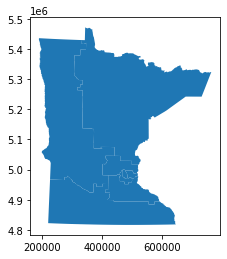

In [36]:
data.plot()

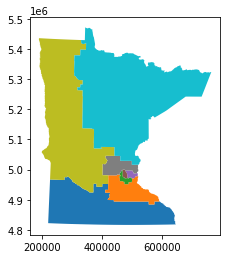

In [37]:
data.plot(column = 'DISTRICT')

In [38]:
print(data['DISTRICT'].unique())

['1' '2' '3' '4' '5' '6' '7' '8']


In [39]:
dt_1 = data[data['DISTRICT'] == '1']['geometry']

p_1 = shapely.ops.unary_union(dt_1).length / 1000
print("District 1 perimeter is: {:.1f} km".format(p_1))
a_1 = shapely.ops.unary_union(dt_1).area / 10**6
print("District 1 area is: {:.1f} km^2".format(a_1))
c_1 = shapely.ops.unary_union(dt_1).convex_hull.area / 10**6
print("District 1 convex hull area is: {:.1f} km^2".format(c_1))

District 1 perimeter is: 1297.1 km
District 1 area is: 42267.2 km^2
District 1 convex hull area is: 50479.1 km^2


In [40]:
dt_2 = data[data['DISTRICT'] == '2']['geometry']

p_2 = shapely.ops.unary_union(dt_2).length / 1000
print("District 2 perimeter is: {:.1f} km".format(p_2))
a_2 = shapely.ops.unary_union(dt_2).area / 10**6
print("District 2 area is: {:.1f} km^2".format(a_2))
c_2 = shapely.ops.unary_union(dt_2).convex_hull.area / 10**6
print("District 2 convex hull area is: {:.1f} km^2".format(c_2))

District 2 perimeter is: 646.5 km
District 2 area is: 10057.4 km^2
District 2 convex hull area is: 13382.5 km^2


In [41]:
dt_3 = data[data['DISTRICT'] == '3']['geometry']

p_3 = shapely.ops.unary_union(dt_3).length / 1000
print("District 3 perimeter is: {:.1f} km".format(p_3))
a_3 = shapely.ops.unary_union(dt_3).area / 10**6
print("District 3 area is: {:.1f} km^2".format(a_3))
c_3 = shapely.ops.unary_union(dt_3).convex_hull.area / 10**6
print("District 3 convex hull are is: {:.1f} km^2".format(c_3))

District 3 perimeter is: 212.5 km
District 3 area is: 837.4 km^2
District 3 convex hull are is: 1368.4 km^2


In [42]:
dt_4 = data[data['DISTRICT'] == '4']['geometry']

p_4 = shapely.ops.unary_union(dt_4).length / 1000
print("District 4 perimeter is: {:.1f} km".format(p_4))
a_4 = shapely.ops.unary_union(dt_4).area / 10**6
print("District 4 area is: {:.1f} km^2".format(a_4))
c_4 = shapely.ops.unary_union(dt_4).convex_hull.area / 10**6
print("District 4 convex hull are is: {:.1f} km^2".format(c_4))

District 4 perimeter is: 150.4 km
District 4 area is: 701.9 km^2
District 4 convex hull are is: 852.4 km^2


In [43]:
dt_5 = data[data['DISTRICT'] == '5']['geometry']

p_5 = shapely.ops.unary_union(dt_5).length / 1000
print("District 5 perimeter is: {:.1f} km".format(p_5))
a_5 = shapely.ops.unary_union(dt_5).area / 10**6
print("District 5 area is: {:.1f} km^2".format(a_5))
c_5 = shapely.ops.unary_union(dt_5).convex_hull.area / 10**6
print("District 5 convex hull are is: {:.1f} km^2".format(c_5))

District 5 perimeter is: 99.9 km
District 5 area is: 349.3 km^2
District 5 convex hull are is: 392.8 km^2


In [44]:
dt_6 = data[data['DISTRICT'] == '6']['geometry']

p_6 = shapely.ops.unary_union(dt_6).length / 1000
print("District 6 perimeter is: {:.1f} km".format(p_6))
a_6 = shapely.ops.unary_union(dt_6).area / 10**6
print("District 6 area is: {:.1f} km^2".format(a_6))
c_6 = shapely.ops.unary_union(dt_6).convex_hull.area / 10**6
print("District 6 convex hull area is: {:.1f} km^2".format(c_6))

District 6 perimeter is: 423.3 km
District 6 area is: 5186.4 km^2
District 6 convex hull area is: 6481.1 km^2


In [45]:
dt_7 = data[data['DISTRICT'] == '7']['geometry']

p_7 = shapely.ops.unary_union(dt_7).length / 1000
print("District 7 perimeter is: {:.1f} km".format(p_7))
a_7 = shapely.ops.unary_union(dt_7).area / 10**6
print("District 7 area is: {:.1f} km^2".format(a_7))
c_7 = shapely.ops.unary_union(dt_7).convex_hull.area / 10**6
print("District 7 convex hull area is: {:.1f} km^2".format(c_7))

District 7 perimeter is: 2138.3 km
District 7 area is: 69746.0 km^2
District 7 convex hull area is: 99736.5 km^2


In [46]:
dt_8 = data[data['DISTRICT'] == '8']['geometry']

p_8 = shapely.ops.unary_union(dt_8).length / 1000
print("District 8 perimeter is: {:.1f} km".format(p_8))
a_8 = shapely.ops.unary_union(dt_8).area / 10**6
print("District 8 area is: {:.1f} km^2".format(a_8))
c_8 = shapely.ops.unary_union(dt_8).convex_hull.area / 10**6
print("District 8 convex hull area is: {:.1f} km^2".format(c_8))

District 8 perimeter is: 2005.1 km
District 8 area is: 95989.2 km^2
District 8 convex hull area is: 131058.0 km^2
